# Library Imports

In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from google.colab import drive
import time
drive.mount('/content/drive')

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x1047c2d90>>
Traceback (most recent call last):
  File "/Users/Christian/Library/Python/3.11/lib/python/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


# Data Imports

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Copy of BBG_data_2024.csv")

<ipython-input-2-dd607e73b86a>:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263

In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V7537,V7538,V7539,V7540,V7541,V7542,V7543,V7544,V7545,V7546
0,NaN,AGILENT TECHNOLOGIES INC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,A UN Equity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Last Price,High Price,Low Price,Total Return Index (Gross Dividends),Historical Market Cap,Overridable Adjusted Beta,Dividend Per Share,Price to Book Ratio,Price Earnings Ratio (P/E),...,Overridable Adjusted Beta,Dividend Per Share,Price to Book Ratio,Price Earnings Ratio (P/E),Price to Sales Ratio,Price/Cash Flow,RSI 30 Day,Relative Share Price Momentum,Overridable Adjusted Beta,Volume
3,Dates,PX_LAST,PX_HIGH,PX_LOW,TOT_RETURN_INDEX_GROSS_DVDS,HISTORICAL_MARKET_CAP,BETA_ADJ_OVERRIDABLE,IS_DIV_PER_SHR,PX_TO_BOOK_RATIO,PE_RATIO,...,BETA_ADJ_OVERRIDABLE,IS_DIV_PER_SHR,PX_TO_BOOK_RATIO,PE_RATIO,PX_TO_SALES_RATIO,PX_TO_CASH_FLOW,RSI_30D,REL_SHR_PX_MOMENTUM,BETA_ADJ_OVERRIDABLE,PX_VOLUME
4,12/31/2009,22.2178,22.7183,22.1176,22.2178,NaN,1.0255,NaN,3.0676,44.8798,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1 = df.iloc[3:]
df1 = df1.reset_index(drop=True)
df1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V7537,V7538,V7539,V7540,V7541,V7542,V7543,V7544,V7545,V7546
0,Dates,PX_LAST,PX_HIGH,PX_LOW,TOT_RETURN_INDEX_GROSS_DVDS,HISTORICAL_MARKET_CAP,BETA_ADJ_OVERRIDABLE,IS_DIV_PER_SHR,PX_TO_BOOK_RATIO,PE_RATIO,...,BETA_ADJ_OVERRIDABLE,IS_DIV_PER_SHR,PX_TO_BOOK_RATIO,PE_RATIO,PX_TO_SALES_RATIO,PX_TO_CASH_FLOW,RSI_30D,REL_SHR_PX_MOMENTUM,BETA_ADJ_OVERRIDABLE,PX_VOLUME
1,12/31/2009,22.2178,22.7183,22.1176,22.2178,NaN,1.0255,NaN,3.0676,44.8798,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/4/2010,22.3822,22.6111,22.2678,22.3822,NaN,1.0247,NaN,3.0903,45.212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/5/2010,22.1391,22.275,22.0032,22.1391,NaN,1.0244,NaN,3.0567,44.7209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/6/2010,22.0604,22.1677,22.0032,22.0604,NaN,1.0244,NaN,3.0459,44.562,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Datacleaning for Tickers and Sectors

In [ ]:
start_date = '2009-07-01'
end_date = '2023-01-01'
pd.options.display.max_rows = None
pd.options.display.max_columns = None


tickers = df.iloc[[1]]
tickers = tickers.dropna(axis=1)
tickers = tickers.reset_index(drop=True)
tickers = tickers.apply(lambda col: col.str.split().str[0])
tickers.columns = range(len(tickers.columns))
dates_column = df.iloc[3:, 0]
tickers

ticker_list = tickers.iloc[0].tolist()  # This assumes tickers are in the first row

# Correct ticker symbols for the API call
corrected_tickers = [ticker.replace('/', '-') for ticker in ticker_list]

# Function to fetch sector information
def fetch_sector(ticker):
    attempts = 0
    while attempts < 5:
        try:
            stock = yf.Ticker(ticker)
            info = stock.info
            return info.get('sector', 'Sector information unavailable')
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}. Retrying...")
            attempts += 1
            time.sleep(1)  # Pause between retries
    return "Failed to fetch data"

# Fetch sector information for each corrected ticker
sectors = [fetch_sector(ticker) for ticker in corrected_tickers]

# Add the sector data as a new row to the DataFrame
tickers.loc['Sector'] = sectors

In [ ]:
sectors_df = pd.DataFrame(tickers.iloc[1]).T
sectors_df.iloc[0].value_counts()

Sector
Technology                76
Industrials               73
Financial Services        66
Healthcare                65
Consumer Cyclical         57
Consumer Defensive        37
Utilities                 31
Real Estate               31
Energy                    23
Basic Materials           22
Communication Services    22
Name: count, dtype: int64

In [ ]:
tickers


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502
0,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALL,ALLE,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,AON,AOS,APA,APD,APH,APTV,ARE,ATO,AVB,AVGO,AVY,AWK,AXON,AXP,AZO,BA,BAC,BALL,BAX,BBWI,BBY,BDX,BEN,BF/B,BG,BIIB,BIO,BK,BKNG,BKR,BLDR,BLK,BMY,BR,BRK/B,BRO,BSX,BWA,BX,BXP,C,CAG,CAH,CARR,CAT,CB,CBOE,CBRE,CCI,CCL,CDNS,CDW,CE,CEG,CF,CFG,CHD,CHRW,CHTR,CI,CINF,CL,CLX,CMA,CMCSA,CME,CMG,CMI,CMS,CNC,CNP,COF,COO,COP,COR,COST,CPAY,CPB,CPRT,CPT,CRL,CRM,CSCO,CSGP,CSX,CTAS,CTLT,CTRA,CTSH,CTVA,CVS,CVX,CZR,D,DAL,DAY,DD,DE,DECK,DFS,DG,DGX,DHI,DHR,DIS,DLR,DLTR,DOC,DOV,DOW,DPZ,DRI,DTE,DUK,DVA,DVN,DXCM,EA,EBAY,ECL,ED,EFX,EG,EIX,EL,ELV,EMN,EMR,ENPH,EOG,EPAM,EQIX,EQR,EQT,ES,ESS,ETN,ETR,ETSY,EVRG,EW,EXC,EXPD,EXPE,EXR,F,FANG,FAST,FCX,FDS,FDX,FE,FFIV,FI,FICO,FIS,FITB,FMC,FOX,FOXA,FRT,FSLR,FTNT,FTV,GD,GE,GEHC,GEN,GEV,GILD,GIS,GL,GLW,GM,GNRC,GOOG,GOOGL,GPC,GPN,GRMN,GS,GWW,HAL,HAS,HBAN,HCA,HD,HES,HIG,HII,HLT,HOLX,HON,HPE,HPQ,HRL,HSIC,HST,HSY,HUBB,HUM,HWM,IBM,ICE,IDXX,IEX,IFF,ILMN,INCY,INTC,INTU,INVH,IP,IPG,IQV,IR,IRM,ISRG,IT,ITW,IVZ,J,JBHT,JBL,JCI,JKHY,JNJ,JNPR,JPM,K,KDP,KEY,KEYS,KHC,KIM,KLAC,KMB,KMI,KMX,KO,KR,KVUE,L,LDOS,LEN,LH,LHX,LIN,LKQ,LLY,LMT,LNT,LOW,LRCX,LULU,LUV,LVS,LW,LYB,LYV,MA,MAA,MAR,MAS,MCD,MCHP,MCK,MCO,MDLZ,MDT,MET,META,MGM,MHK,MKC,MKTX,MLM,MMC,MMM,MNST,MO,MOH,MOS,MPC,MPWR,MRK,MRNA,MRO,MS,MSCI,MSFT,MSI,MTB,MTCH,MTD,MU,NCLH,NDAQ,NDSN,NEE,NEM,NFLX,NI,NKE,NOC,NOW,NRG,NSC,NTAP,NTRS,NUE,NVDA,NVR,NWS,NWSA,NXPI,O,ODFL,OKE,OMC,ON,ORCL,ORLY,OTIS,OXY,PANW,PARA,PAYC,PAYX,PCAR,PCG,PEG,PEP,PFE,PFG,PG,PGR,PH,PHM,PKG,PLD,PM,PNC,PNR,PNW,PODD,POOL,PPG,PPL,PRU,PSA,PSX,PTC,PWR,PXD,PYPL,QCOM,QRVO,RCL,REG,REGN,RF,RHI,RJF,RL,RMD,ROK,ROL,ROP,ROST,RSG,RTX,RVTY,SBAC,SBUX,SCHW,SHW,SJM,SLB,SMCI,SNA,SNPS,SO,SOLV,SPG,SPGI,SRE,STE,STLD,STT,STX,STZ,SWK,SWKS,SYF,SYK,SYY,T,TAP,TDG,TDY,TECH,TEL,TER,TFC,TFX,TGT,TJX,TMO,TMUS,TPR,TRGP,TRMB,TROW,TRV,TSCO,TSLA,TSN,TT,TTWO,TXN,TXT,TYL,UAL,UBER,UDR,UHS,ULTA,UNH,UNP,UPS,URI,USB,V,VICI,VLO,VLTO,VMC,VRSK,VRSN,VRTX,VTR,VTRS,VZ,WAB,WAT,WBA,WBD,WDC,WEC,WELL,WFC,WM,WMB,WMT,WRB,WRK,WST,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZT

# Data Cleaning for Market Cap

In [ ]:
market_cap_columns = df1.iloc[0] == "HISTORICAL_MARKET_CAP"
market_cap_columns = market_cap_columns[market_cap_columns].index

market_cap_df = df1.loc[:, market_cap_columns]
market_cap_df.columns = tickers.iloc[0]
market_cap_df = market_cap_df.iloc[1:]
dates_column = df1.iloc[1:, 0]
market_cap_df.index = dates_column
market_cap_df.index = pd.to_datetime(market_cap_df.index)
market_cap_df = market_cap_df.loc[start_date:end_date]

market_cap_df.head(5)

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALL,ALLE,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,AON,AOS,APA,APD,APH,APTV,ARE,ATO,AVB,AVGO,AVY,AWK,AXON,AXP,AZO,BA,BAC,BALL,BAX,BBWI,BBY,BDX,BEN,BF/B,BG,BIIB,BIO,BK,BKNG,BKR,BLDR,BLK,BMY,BR,BRK/B,BRO,BSX,BWA,BX,BXP,C,CAG,CAH,CARR,CAT,CB,CBOE,CBRE,CCI,CCL,CDNS,CDW,CE,CEG,CF,CFG,CHD,CHRW,CHTR,CI,CINF,CL,CLX,CMA,CMCSA,CME,CMG,CMI,CMS,CNC,CNP,COF,COO,COP,COR,COST,CPAY,CPB,CPRT,CPT,CRL,CRM,CSCO,CSGP,CSX,CTAS,CTLT,CTRA,CTSH,CTVA,CVS,CVX,CZR,D,DAL,DAY,DD,DE,DECK,DFS,DG,DGX,DHI,DHR,DIS,DLR,DLTR,DOC,DOV,DOW,DPZ,DRI,DTE,DUK,DVA,DVN,DXCM,EA,EBAY,ECL,ED,EFX,EG,EIX,EL,ELV,EMN,EMR,ENPH,EOG,EPAM,EQIX,EQR,EQT,ES,ESS,ETN,ETR,ETSY,EVRG,EW,EXC,EXPD,EXPE,EXR,F,FANG,FAST,FCX,FDS,FDX,FE,FFIV,FI,FICO,FIS,FITB,FMC,FOX,FOXA,FRT,FSLR,FTNT,FTV,GD,GE,GEHC,GEN,GEV,GILD,GIS,GL,GLW,GM,GNRC,GOOG,GOOGL,GPC,GPN,GRMN,GS,GWW,HAL,HAS,HBAN,HCA,HD,HES,HIG,HII,HLT,HOLX,HON,HPE,HPQ,HRL,HSIC,HST,HSY,HUBB,HUM,HWM,IBM,ICE,IDXX,IEX,IFF,ILMN,INCY,INTC,INTU,INVH,IP,IPG,IQV,IR,IRM,ISRG,IT,ITW,IVZ,J,JBHT,JBL,JCI,JKHY,JNJ,JNPR,JPM,K,KDP,KEY,KEYS,KHC,KIM,KLAC,KMB,KMI,KMX,KO,KR,KVUE,L,LDOS,LEN,LH,LHX,LIN,LKQ,LLY,LMT,LNT,LOW,LRCX,LULU,LUV,LVS,LW,LYB,LYV,MA,MAA,MAR,MAS,MCD,MCHP,MCK,MCO,MDLZ,MDT,MET,META,MGM,MHK,MKC,MKTX,MLM,MMC,MMM,MNST,MO,MOH,MOS,MPC,MPWR,MRK,MRNA,MRO,MS,MSCI,MSFT,MSI,MTB,MTCH,MTD,MU,NCLH,NDAQ,NDSN,NEE,NEM,NFLX,NI,NKE,NOC,NOW,NRG,NSC,NTAP,NTRS,NUE,NVDA,NVR,NWS,NWSA,NXPI,O,ODFL,OKE,OMC,ON,ORCL,ORLY,OTIS,OXY,PANW,PARA,PAYC,PAYX,PCAR,PCG,PEG,PEP,PFE,PFG,PG,PGR,PH,PHM,PKG,PLD,PM,PNC,PNR,PNW,PODD,POOL,PPG,PPL,PRU,PSA,PSX,PTC,PWR,PXD,PYPL,QCOM,QRVO,RCL,REG,REGN,RF,RHI,RJF,RL,RMD,ROK,ROL,ROP,ROST,RSG,RTX,RVTY,SBAC,SBUX,SCHW,SHW,SJM,SLB,SMCI,SNA,SNPS,SO,SOLV,SPG,SPGI,SRE,STE,STLD,STT,STX,STZ,SWK,SWKS,SYF,SYK,SYY,T,TAP,TDG,TDY,TECH,TEL,TER,TFC,TFX,TGT,TJX,TMO,TMUS,TPR,TRGP,TRMB,TROW,TRV,TSCO,TSLA,TSN,TT,TTWO,TXN,TXT,TYL,UAL,UBER,UDR,UHS,ULTA,UNH,UNP,UPS,URI,USB,V,VICI,VLO,VLTO,VMC,VRSK,VRSN,VRTX,VTR,VTRS,VZ,WAB,WAT,WBA,WBD,WDC,WEC,WELL,WFC,WM,WMB,WMT,WRB,WRK,WST,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
V1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,83747.5381,3918.1981,NaN,NaN,NaN,20119.5268,21534.178,NaN,6635.33,16631.5128,8886.8196,NaN,4049.4258,3438.8041,2307.275,4339.4333,3328.1823,1328.8018,16131.48,NaN,NaN,NaN,NaN,4125.4841,56287.15,9902.807,17707.0876,59726.88,NaN,3897.3033,10209.942,2073.446,34710.2024,17197.0695,7998.8345,NaN,2818.8626,2733.3426,6694.3427,NaN,NaN,3913.4583,272.0815,48299.84,NaN,39314.1387,130272.6735,4860.8634,35265.0194,NaN,NaN,18587.2497,24041.435,NaN,8559.4055,14704.7425,2669.5903,33783.137,9955.358,NaN,139.5725,14372.306,43152.25,3036.576,NaN,2553.1057,13596.7854,3881.3436,15663.237,9314.6823,9427.9624,NaN,11648.312,NaN,35602.9478,16960.8427,NaN,4366.3837,NaN,NaN,NaN,NaN,4635.0498,NaN,4409.1832,NaN,4304.3286,9813.6655,3996.479,9673.0444,4250.88,40598.53,8554.6369,4470.3816,47841.4944,22010.084,2775.5413,9094.038,3568.914,965.2119,5673.41,17451.2253,NaN,75903.1185,7399.3262,NaN,NaN,NaN,NaN,3262.3205,NaN,NaN,NaN,861.1721,NaN,NaN,NaN,4518.2886,13473.4807,NaN,44804.11,154574.5018,NaN,23313.08,8921.4054,NaN,NaN,NaN,1308.933,NaN,NaN,11067.2313,3455.2924,48539.344,NaN,3862.1467,NaN,8964.9609,7790.7288,NaN,NaN,NaN,7209.788,22527.89,6053.9029,32832.45,371.5832,5804.25,30537.2105,10547.628,12771.4516,3898.318,5082.344,11331.7137,9535.812,26218.24,4360.4946,32054.1709,NaN,24569.0918,NaN,4173.3138,9457.0166,5750.4895,4529.2404,2413.284,10570.463,15477.4341,NaN,NaN,4933.

# Data Cleaning for Price and Daily Returns

In [ ]:
price_columns = df1.iloc[0] == "PX_LAST"
price_columns = price_columns[price_columns].index

price_df = df1.loc[:, price_columns]
price_df.columns = tickers.iloc[0]
price_df = price_df.iloc[1:]
price_df.index = dates_column
price_df.index = pd.to_datetime(price_df.index)
price_df = price_df.loc[start_date:end_date]
daily_returns = (price_df.pct_change())
daily_returns.head()

TypeError: unsupported operand type(s) for /: 'str' and 'str'

# Data Cleaning for RSI

In [ ]:
RSI_30D_columns = df1.iloc[0] == "RSI_30D"
RSI_30D_columns = RSI_30D_columns[RSI_30D_columns].index

RSI_30D_DF = df1.loc[:, RSI_30D_columns]
RSI_30D_DF.columns = tickers.iloc[0]
RSI_30D_DF = RSI_30D_DF.iloc[1:]
RSI_30D_DF.index = dates_column
RSI_30D_DF.index = pd.to_datetime(RSI_30D_DF.index)
RSI_30D_DF = RSI_30D_DF.loc[start_date:end_date]
RSI_30D_DF.head(5)

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALL,ALLE,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,AON,AOS,APA,APD,APH,APTV,ARE,ATO,AVB,AVGO,AVY,AWK,AXON,AXP,AZO,BA,BAC,BALL,BAX,BBWI,BBY,BDX,BEN,BF/B,BG,BIIB,BIO,BK,BKNG,BKR,BLDR,BLK,BMY,BR,BRK/B,BRO,BSX,BWA,BX,BXP,C,CAG,CAH,CARR,CAT,CB,CBOE,CBRE,CCI,CCL,CDNS,CDW,CE,CEG,CF,CFG,CHD,CHRW,CHTR,CI,CINF,CL,CLX,CMA,CMCSA,CME,CMG,CMI,CMS,CNC,CNP,COF,COO,COP,COR,COST,CPAY,CPB,CPRT,CPT,CRL,CRM,CSCO,CSGP,CSX,CTAS,CTLT,CTRA,CTSH,CTVA,CVS,CVX,CZR,D,DAL,DAY,DD,DE,DECK,DFS,DG,DGX,DHI,DHR,DIS,DLR,DLTR,DOC,DOV,DOW,DPZ,DRI,DTE,DUK,DVA,DVN,DXCM,EA,EBAY,ECL,ED,EFX,EG,EIX,EL,ELV,EMN,EMR,ENPH,EOG,EPAM,EQIX,EQR,EQT,ES,ESS,ETN,ETR,ETSY,EVRG,EW,EXC,EXPD,EXPE,EXR,F,FANG,FAST,FCX,FDS,FDX,FE,FFIV,FI,FICO,FIS,FITB,FMC,FOX,FOXA,FRT,FSLR,FTNT,FTV,GD,GE,GEHC,GEN,GEV,GILD,GIS,GL,GLW,GM,GNRC,GOOG,GOOGL,GPC,GPN,GRMN,GS,GWW,HAL,HAS,HBAN,HCA,HD,HES,HIG,HII,HLT,HOLX,HON,HPE,HPQ,HRL,HSIC,HST,HSY,HUBB,HUM,HWM,IBM,ICE,IDXX,IEX,IFF,ILMN,INCY,INTC,INTU,INVH,IP,IPG,IQV,IR,IRM,ISRG,IT,ITW,IVZ,J,JBHT,JBL,JCI,JKHY,JNJ,JNPR,JPM,K,KDP,KEY,KEYS,KHC,KIM,KLAC,KMB,KMI,KMX,KO,KR,KVUE,L,LDOS,LEN,LH,LHX,LIN,LKQ,LLY,LMT,LNT,LOW,LRCX,LULU,LUV,LVS,LW,LYB,LYV,MA,MAA,MAR,MAS,MCD,MCHP,MCK,MCO,MDLZ,MDT,MET,META,MGM,MHK,MKC,MKTX,MLM,MMC,MMM,MNST,MO,MOH,MOS,MPC,MPWR,MRK,MRNA,MRO,MS,MSCI,MSFT,MSI,MTB,MTCH,MTD,MU,NCLH,NDAQ,NDSN,NEE,NEM,NFLX,NI,NKE,NOC,NOW,NRG,NSC,NTAP,NTRS,NUE,NVDA,NVR,NWS,NWSA,NXPI,O,ODFL,OKE,OMC,ON,ORCL,ORLY,OTIS,OXY,PANW,PARA,PAYC,PAYX,PCAR,PCG,PEG,PEP,PFE,PFG,PG,PGR,PH,PHM,PKG,PLD,PM,PNC,PNR,PNW,PODD,POOL,PPG,PPL,PRU,PSA,PSX,PTC,PWR,PXD,PYPL,QCOM,QRVO,RCL,REG,REGN,RF,RHI,RJF,RL,RMD,ROK,ROL,ROP,ROST,RSG,RTX,RVTY,SBAC,SBUX,SCHW,SHW,SJM,SLB,SMCI,SNA,SNPS,SO,SOLV,SPG,SPGI,SRE,STE,STLD,STT,STX,STZ,SWK,SWKS,SYF,SYK,SYY,T,TAP,TDG,TDY,TECH,TEL,TER,TFC,TFX,TGT,TJX,TMO,TMUS,TPR,TRGP,TRMB,TROW,TRV,TSCO,TSLA,TSN,TT,TTWO,TXN,TXT,TYL,UAL,UBER,UDR,UHS,ULTA,UNH,UNP,UPS,URI,USB,V,VICI,VLO,VLTO,VMC,VRSK,VRSN,VRTX,VTR,VTRS,VZ,WAB,WAT,WBA,WBD,WDC,WEC,WELL,WFC,WM,WMB,WMT,WRB,WRK,WST,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
V1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-07-01,49.9047,NaN,42.3513,46.7417,NaN,45.2406,51.6715,37.2164,57.515,50.5944,55.9207,54.9546,41.1638,48.0325,NaN,44.5682,57.9844,55.3609,60.4642,55.4181,51.7501,49.3491,60.1182,53.3316,NaN,51.2627,NaN,NaN,55.5146,47.0027,54.7234,40.701,56.9914,NaN,48.18,55.1467,49.5959,NaN,52.6133,53.5913,61.588,42.517,46.7021,52.2034,56.546,53.6877,46.3037,49.7769,57.7486,56.6739,61.1794,51.2806,39.1812,49.7944,49.4343,62.3574,54.5347,41.7043,44.9234,52.1356,53.7307,46.4049,48.4503,62.3832,NaN,NaN,46.3706,52.5971,58.3986,54.7316,55.7676,60.3428,58.5519,50.0367,45.9436,50.0054,54.1142,55.2002,NaN,43.5839,52.1147,77.1894,49.8828,50.4916,52.8209,53.2456,NaN,45.7233,NaN,37.1897,NaN,49.9817,47.6347,63.8226,62.6589,49.0872,48.1073,47.7848,60.614,49.4268,69.048,53.2536,46.0982,45.1826,59.0349,49.6726,59.2687,NaN,51.0795,54.8329,52.174,52.242,52.7464,42.2278,50.0083,47.0924,43.1092,58.478,70.9462,NaN,53.066,NaN,53.4475,46.3383,NaN,50.44,47.6829,NaN,46.5954,58.8211,NaN,45.5268,40.4677,NaN,57.5296,52.8531,50.6881,40.4017,57.9582,52.9331,44.4494,59.9226,42.0043,54.2126,NaN,58.3736,47.6235,44.9288,42.9952,45.9803,42.035,63.0958,60.0741,49.5049,55.3431,45.3652,48.4506,51.4451,46.2466,48.8166,62.6839,51.6944,47.7282,54.6913,54.7982,56.4746,42.1175,51.1938,55.4796,45.8797,52.8037,55.7581,52.5523,NaN,NaN,44.2965,NaN,NaN,55.2819,49.3412,58.579,59.1011,42.0556,42.6343,58.945,51.1322,33.2253,38.7746,NaN

# Calculate Avg RSI by sector

In [ ]:
import pandas as pd

# Assuming 'tickers' DataFrame has tickers as columns and 'sectors_df' stores the corresponding sectors
ticker_to_sector = {ticker: sector for ticker, sector in zip(tickers.iloc[0], sectors_df.iloc[0])}

# Replace ticker columns in RSI_30D_DF with their corresponding sectors
RSI_30D_DF.columns = [ticker_to_sector[ticker] for ticker in RSI_30D_DF.columns]

# Aggregate RSI values by sector by taking the mean across the same sector columns
RSI_30D_DF_by_sector = RSI_30D_DF.groupby(RSI_30D_DF.columns, axis=1).mean()

# Resample to get monthly average RSI values
monthly_RSI_averages = RSI_30D_DF_by_sector.resample('Q').mean()

# Print or plot the results
monthly_RSI_averages

,Basic Materials,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities
V1,,,,,,,,,,,
2013-09-30,52.744670,55.931004,54.988220,51.871789,54.281622,55.161469,55.256841,55.830855,47.064462,55.518046,49.431491
2013-12-31,55.060306,55.214438,55.710138,54.039527,54.907589,57.077907,55.919758,58.098223,48.985465,56.029242,50.780701
2014-03-31,53.959727,54.023147,52.723575,50.601789,53.210140,52.266418,55.353498,54.682474,54.806128,55.444717,54.113896
2014-06-30,53.918777,52.673273,50.275129,54.661610,59.291815,51.886819,52.787817,53.831769,56.786223,53.295275,56.849654
2014-09-30,52.158186,53.818442,52.140294,51.933405,51.856813,53.284434,54.487709,51.131376,54.393466,54.306702,50.217982
2014-12-31,47.056431,49.845813,54.609684,56.384061,42.877385,54.477487,55.926014,53.128226,57.034936,53.294981,56.620395
2015-03-31,52.295795,53.616671,54.432823,53.567345,47.962017,51.577565,56.119598,52.835924,55.474793,53.756061,50.321842
2015-06-30,53.331235,51.761198,52.224541,51.177892,50.786862,53.203504,54.031083,50.827052,47.355847,51.509133,46.114049
2015-09-30,43.888153,50.680873,49.943278,50.507089,41.003269,48.373602,49.054919,45.446326,49.115970,46.163242,48.869387


# Sort market cap data by quarter

In [ ]:
quarterly_market_cap_df = market_cap_df.apply(pd.to_numeric, errors='coerce').resample('Q').mean()
quarterly_market_cap_df

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALL,ALLE,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,AON,AOS,APA,APD,APH,APTV,ARE,ATO,AVB,AVGO,AVY,AWK,AXON,AXP,AZO,BA,BAC,BALL,BAX,BBWI,BBY,BDX,BEN,BF/B,BG,BIIB,BIO,BK,BKNG,BKR,BLDR,BLK,BMY,BR,BRK/B,BRO,BSX,BWA,BX,BXP,C,CAG,CAH,CARR,CAT,CB,CBOE,CBRE,CCI,CCL,CDNS,CDW,CE,CEG,CF,CFG,CHD,CHRW,CHTR,CI,CINF,CL,CLX,CMA,CMCSA,CME,CMG,CMI,CMS,CNC,CNP,COF,COO,COP,COR,COST,CPAY,CPB,CPRT,CPT,CRL,CRM,CSCO,CSGP,CSX,CTAS,CTLT,CTRA,CTSH,CTVA,CVS,CVX,CZR,D,DAL,DAY,DD,DE,DECK,DFS,DG,DGX,DHI,DHR,DIS,DLR,DLTR,DOC,DOV,DOW,DPZ,DRI,DTE,DUK,DVA,DVN,DXCM,EA,EBAY,ECL,ED,EFX,EG,EIX,EL,ELV,EMN,EMR,ENPH,EOG,EPAM,EQIX,EQR,EQT,ES,ESS,ETN,ETR,ETSY,EVRG,EW,EXC,EXPD,EXPE,EXR,F,FANG,FAST,FCX,FDS,FDX,FE,FFIV,FI,FICO,FIS,FITB,FMC,FOX,FOXA,FRT,FSLR,FTNT,FTV,GD,GE,GEHC,GEN,GEV,GILD,GIS,GL,GLW,GM,GNRC,GOOG,GOOGL,GPC,GPN,GRMN,GS,GWW,HAL,HAS,HBAN,HCA,HD,HES,HIG,HII,HLT,HOLX,HON,HPE,HPQ,HRL,HSIC,HST,HSY,HUBB,HUM,HWM,IBM,ICE,IDXX,IEX,IFF,ILMN,INCY,INTC,INTU,INVH,IP,IPG,IQV,IR,IRM,ISRG,IT,ITW,IVZ,J,JBHT,JBL,JCI,JKHY,JNJ,JNPR,JPM,K,KDP,KEY,KEYS,KHC,KIM,KLAC,KMB,KMI,KMX,KO,KR,KVUE,L,LDOS,LEN,LH,LHX,LIN,LKQ,LLY,LMT,LNT,LOW,LRCX,LULU,LUV,LVS,LW,LYB,LYV,MA,MAA,MAR,MAS,MCD,MCHP,MCK,MCO,MDLZ,MDT,MET,META,MGM,MHK,MKC,MKTX,MLM,MMC,MMM,MNST,MO,MOH,MOS,MPC,MPWR,MRK,MRNA,MRO,MS,MSCI,MSFT,MSI,MTB,MTCH,MTD,MU,NCLH,NDAQ,NDSN,NEE,NEM,NFLX,NI,NKE,NOC,NOW,NRG,NSC,NTAP,NTRS,NUE,NVDA,NVR,NWS,NWSA,NXPI,O,ODFL,OKE,OMC,ON,ORCL,ORLY,OTIS,OXY,PANW,PARA,PAYC,PAYX,PCAR,PCG,PEG,PEP,PFE,PFG,PG,PGR,PH,PHM,PKG,PLD,PM,PNC,PNR,PNW,PODD,POOL,PPG,PPL,PRU,PSA,PSX,PTC,PWR,PXD,PYPL,QCOM,QRVO,RCL,REG,REGN,RF,RHI,RJF,RL,RMD,ROK,ROL,ROP,ROST,RSG,RTX,RVTY,SBAC,SBUX,SCHW,SHW,SJM,SLB,SMCI,SNA,SNPS,SO,SOLV,SPG,SPGI,SRE,STE,STLD,STT,STX,STZ,SWK,SWKS,SYF,SYK,SYY,T,TAP,TDG,TDY,TECH,TEL,TER,TFC,TFX,TGT,TJX,TMO,TMUS,TPR,TRGP,TRMB,TROW,TRV,TSCO,TSLA,TSN,TT,TTWO,TXN,TXT,TYL,UAL,UBER,UDR,UHS,ULTA,UNH,UNP,UPS,URI,USB,V,VICI,VLO,VLTO,VMC,VRSK,VRSN,VRTX,VTR,VTRS,VZ,WAB,WAT,WBA,WBD,WDC,WEC,WELL,WFC,WM,WMB,WMT,WRB,WRK,WST,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
V1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-09-30,14805.6300,NaN,NaN,71020.5801,NaN,52563.5339,7225.2899,NaN,22957.6245,NaN,24240.72,34872.6840,7891.9700,8452.184,21122.6273,9864.4396,28869.3629,71600.0752,3966.5877,5739.975,9239.1747,5123.0642,3853.4834,23050.80,NaN,NaN,NaN,NaN,11263.5678,84402.6425,17782.4219,29246.8793,143189.12,NaN,8016.2362,22406.440,3829.0737,34389.7463,22505.3734,12226.0400,17998.0336,4526.9650,3860.3666,16445.7708,NaN,NaN,7352.8349,771.3622,80881.92,NaN,88349.4315,147429.2931,6491.1513,35672.8942,NaN,NaN,19403.7847,31892.8812,15502.9280,11196.1947,56870.6250,3369.9297,34673.8656,51619.4982,NaN,571.9829,45268.7328,75852.92,3781.425,NaN,4668.6561,15717.9350,11535.9788,28253.5116,16290.5546,147130.8300,NaN,17783.1500,NaN,53072.0896,31816.9466,3952.9589,7664.7600,NaN,NaN,NaN,3926.760,8324.5776,NaN,12082.3770,NaN,8329.2645,9087.8921,14032.9439,21285.6259,7734.240,54864.8810,10541.5548,7220.5066,117995.0021,24634.3997,13265.0517,NaN,7001.120,3502.9326,10274.5048,40002.8003,6233.5278,85156.6105,14052.6466,NaN,9051.2355,NaN,4079.8423,5938.9133,NaN,26075.0000,NaN,4828.5191,26186.0500,NaN,NaN,15717.3449,24830.5423,NaN,68327.00,233665.5211,NaN,36238.40,20218.0159,NaN,NaN,31803.0131,2276.6790,24198.2310,18054.0935,8983.7717,6274.7945,48734.3250,NaN,6820.1093,NaN,18668.0384,15303.9569,NaN,NaN,NaN,11665.0824,47146.68,12101.0254,23450.560,2023.374,7894.95,72198.7300,29756.388,16152.0695,7271.775,6967.2

# Build dataframe that takes a period and calculates max rsi stocks to go long and min rsi stocks to go short

In [ ]:
# Select the first row of the monthly RSI averages DataFrame
first_row_rsi = monthly_RSI_averages.iloc[25]

# Find the maximum RSI value and the corresponding sector
max_rsi_value = first_row_rsi.max()
min_rsi_value = first_row_rsi.min()
max_rsi_sector = first_row_rsi.idxmax()
min_rsi_sector = first_row_rsi.idxmin()

# Step 1: Use the sector with the highest RSI from the previous output
sector_with_highest_rsi = max_rsi_sector
sector_with_lowest_rsi = min_rsi_sector

# Step 2: Filter the tickers for this sector from your mapping
max_sector_tickers = [ticker for ticker, sec in ticker_to_sector.items() if sec == sector_with_highest_rsi]
min_sector_tickers = [ticker for ticker, sec in ticker_to_sector.items() if sec == sector_with_lowest_rsi]


# Step 3: Select the market cap data for these tickers for the first period
first_period_date = quarterly_market_cap_df.index[0]  # Get the date for the first period
max_first_period_market_caps = quarterly_market_cap_df.loc[first_period_date, max_sector_tickers]
min_first_period_market_caps = quarterly_market_cap_df.loc[first_period_date, min_sector_tickers]

# Step 4: Since values are already averages, we sort them to list the stocks
max_sorted_market_caps = max_first_period_market_caps.sort_values(ascending = True).head(10)
min_sorted_market_caps = min_first_period_market_caps.sort_values(ascending = False).head(10)

df_max_rsi = pd.DataFrame({'Max RSI Stocks': max_sorted_market_caps.index, 'Market Cap': max_sorted_market_caps.values,'Sector': [max_rsi_sector] * len(max_sorted_market_caps)})
df_min_rsi = pd.DataFrame({'Min RSI Stocks': min_sorted_market_caps.index, 'Market Cap': min_sorted_market_caps.values,'Sector': [min_rsi_sector] * len(min_sorted_market_caps) })

combined_df = pd.concat([df_max_rsi, df_min_rsi], axis=1)

combined_df


,Max RSI Stocks,Market Cap,Sector,Min RSI Stocks,Market Cap,Sector
0,MOH,1628.9492,Healthcare,XOM,375908.7600,Energy
1,PODD,1975.8523,Healthcare,CVX,233665.5211,Energy
2,DXCM,2023.3740,Healthcare,SLB,116370.1200,Energy
3,STE,2530.3010,Healthcare,COP,85156.6105,Energy
4,WST,2868.1550,Healthcare,OXY,75398.8429,Energy
5,TECH,2950.4336,Healthcare,EOG,46199.8008,Energy
6,BIO,3369.9297,Healthcare,HAL,40783.0500,Energy
7,CNC,3502.9326,Healthcare,KMI,36845.0716,Energy
8,ALGN,3853.4834,Healthcare,PSX,34665.1967,Energy
9,IDXX,5178.8105,Healthcare,APA,34389.7463,Energy


# Iterate through periods to build stock dataframes for every period

In [ ]:
# Iterate through each row in monthly RSI averages DataFrame
for idx, first_row_rsi in enumerate(monthly_RSI_averages.itertuples(index=False), start=0):
    # Convert the tuple to a dictionary, then to a Series ensuring all values are numeric
    rsi_series = pd.Series({k: v for k, v in zip(monthly_RSI_averages.columns, first_row_rsi) if pd.notna(v)})

    # Coerce any non-numeric types to NaN, which are ignored by idxmax() and idxmin()
    rsi_series = pd.to_numeric(rsi_series, errors='coerce')

    # Determine the maximum and minimum RSI values and corresponding sectors
    max_rsi_sector = rsi_series.idxmax()
    min_rsi_sector = rsi_series.idxmin()

    # Ensure there are sectors to compare
    if pd.isna(max_rsi_sector) or pd.isna(min_rsi_sector):
        continue  # Skip this iteration if no valid RSI data exists

    # Filter the tickers for each sector
    max_sector_tickers = [ticker for ticker, sec in ticker_to_sector.items() if sec == max_rsi_sector]
    min_sector_tickers = [ticker for ticker, sec in ticker_to_sector.items() if sec == min_rsi_sector]

    # Select the market cap data for these tickers for the corresponding period
    if idx < len(quarterly_market_cap_df):
        first_period_date = quarterly_market_cap_df.index[idx]
        max_first_period_market_caps = quarterly_market_cap_df.loc[first_period_date, max_sector_tickers]
        min_first_period_market_caps = quarterly_market_cap_df.loc[first_period_date, min_sector_tickers]

        # Sort and select the top 5
        max_sorted_market_caps = max_first_period_market_caps.sort_values(ascending=True).head(10)
        min_sorted_market_caps = min_first_period_market_caps.sort_values(ascending=False).head(10)

        # Create DataFrames for the top 5 stocks and include the sector
        df_max_rsi = pd.DataFrame({
            'Max RSI Stocks': max_sorted_market_caps.index,
            'Market Cap': max_sorted_market_caps.values,
            'Sector': [max_rsi_sector] * len(max_sorted_market_caps)  # Repeat sector for each stock
        })
        df_min_rsi = pd.DataFrame({
            'Min RSI Stocks': min_sorted_market_caps.index,
            'Market Cap': min_sorted_market_caps.values,
            'Sector': [min_rsi_sector] * len(min_sorted_market_caps)  # Repeat sector for each stock
        })

        # Use globals to create a unique DataFrame for each period
        globals()[f'df_max_rsi_period_{idx}'] = df_max_rsi
        globals()[f'df_min_rsi_period_{idx}'] = df_min_rsi
    else:
        break  # Break the loop if there are no more corresponding periods in quarterly_market_cap_df

# This setup ensures that DataFrames are only created for the indices where corresponding market cap data exists.

# Group daily returns by quarter

In [ ]:
# Grouping the index of daily_returns by quarter
quarterly_groups = daily_returns.groupby(pd.PeriodIndex(daily_returns.index, freq='Q'))


# Create a dictionary to store DataFrames for each quarter
quarterly_returns_dict = {}

for idx, (quarter, data) in enumerate(quarterly_groups, start=0):
    # Store each quarter's DataFrame in its own variable
    globals()[f"daily_returns{idx}"] = data

# Builds portfolio that rebances quarterly based on sector momentum and sector market caps

In [ ]:
# Create a dictionary to store portfolio returns for each quarter
quarterly_portfolio_returns = {}

# Adjust loop to stop one quarter early to accommodate the shift
for idx in range(len(quarterly_groups) - 1):
    # Extract DataFrames for the top and bottom stocks from the current quarter
    df_max_rsi = globals()[f'df_max_rsi_period_{idx}']
    df_min_rsi = globals()[f'df_min_rsi_period_{idx}']

    # Extract daily returns for the top and bottom stocks but for the next quarter
    top_10_returns = globals()[f"daily_returns{idx+1}"][df_min_rsi['Min RSI Stocks']]
    bottom_10_returns = globals()[f"daily_returns{idx+1}"][df_max_rsi['Max RSI Stocks']]

    # Apply the specified weighting
    # Remember to negate the weights for the top 10 as they are short positions
    top_10_weighted = top_10_returns.multiply(-0.03)
    bottom_10_weighted = bottom_10_returns.multiply(0.07)

    # Calculate the portfolio's daily returns by summing the weighted returns
    portfolio_daily_returns = top_10_weighted.sum(axis=1) + bottom_10_weighted.sum(axis=1)

    # Store the portfolio returns for the quarter following the RSI determination in the dictionary
    quarterly_portfolio_returns[f"quarter_{idx+1}"] = portfolio_daily_returns

# Convert quarterly_portfolio_returns dictionary into DataFrame
portfolio_returns_df = pd.concat(quarterly_portfolio_returns, axis=0)
portfolio_returns_df.reset_index(level=0, drop=True, inplace=True)


# Portfolio Cumulative Returns Graph

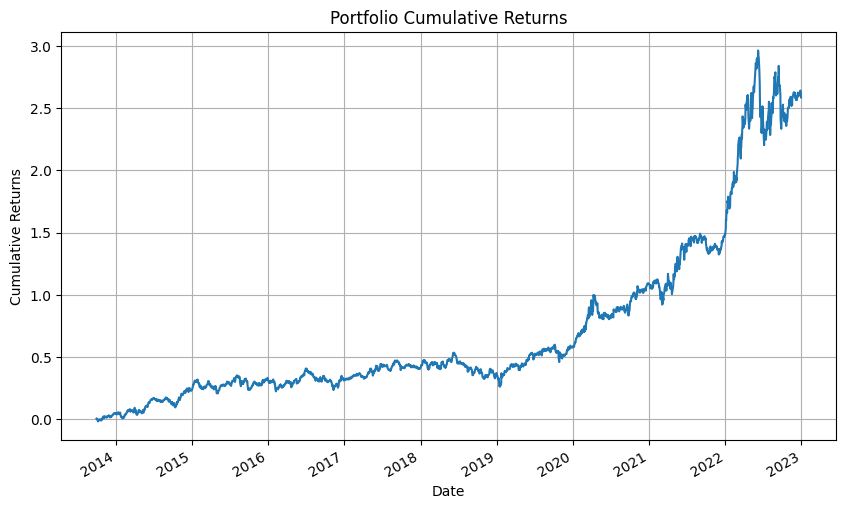

In [ ]:
# Calculate the cumulative returns of the portfolio
portfolio_cumulative_returns = (1 + portfolio_returns_df).cumprod() - 1

# Plotting the cumulative returns
portfolio_cumulative_returns.plot(figsize=(10, 6), title='Portfolio Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.show()

# Portfolio Cumulative Returns vs Benchmark Cumulative Returns Graph

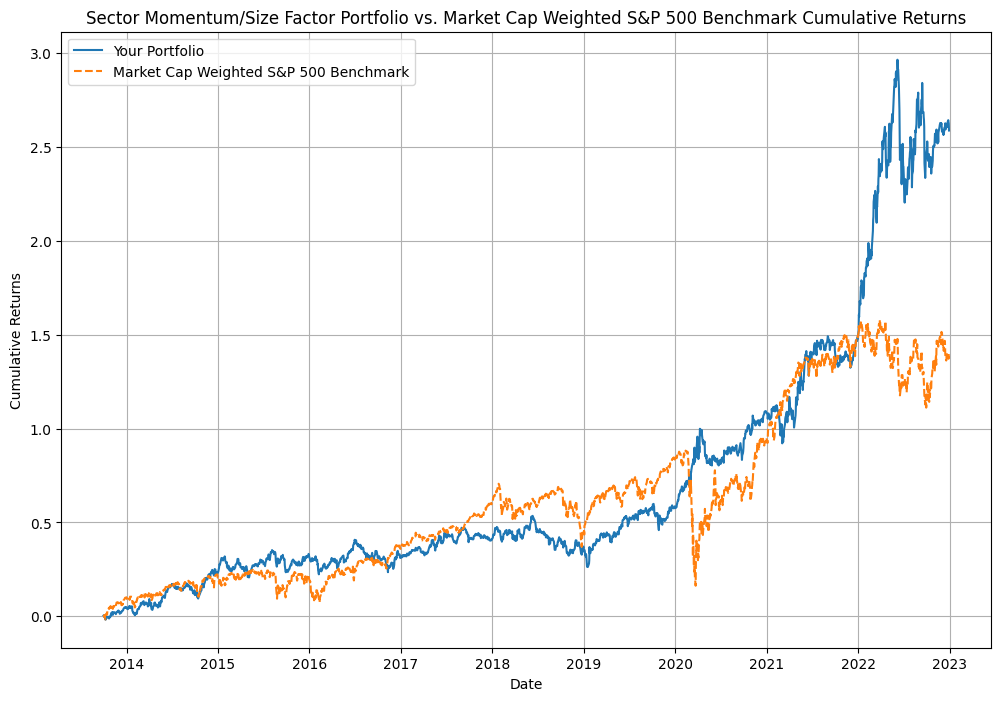

In [ ]:
# Step 1: Select the most recent quarter market cap data
most_recent_quarter_market_cap = quarterly_market_cap_df.iloc[0]

# Step 2: Normalize the weights
total_market_cap = most_recent_quarter_market_cap.sum()
weights = most_recent_quarter_market_cap / total_market_cap

# Ensure weights are aligned with the daily returns DataFrame
daily_returns = price_df.pct_change()
weights_aligned = weights.reindex(daily_returns.columns, fill_value=0)

# Step 3: Calculate the weighted daily returns for the benchmark
weighted_daily_returns = daily_returns.multiply(weights_aligned, axis=1)
benchmark_daily_returns = weighted_daily_returns.sum(axis=1)
benchmark_daily_returns = benchmark_daily_returns.iloc[64:]


# Step 4: Calculate cumulative returns for the benchmark
benchmark_cumulative_returns = (1 + benchmark_daily_returns).cumprod() - 1

# Plotting the cumulative returns for both your portfolio and the benchmark
plt.figure(figsize=(12, 8))
plt.plot(portfolio_cumulative_returns, label='Your Portfolio')
plt.plot(benchmark_cumulative_returns, label='Market Cap Weighted S&P 500 Benchmark', linestyle='--')
plt.title('Sector Momentum/Size Factor Portfolio vs. Market Cap Weighted S&P 500 Benchmark Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

# Portfolio Metrics

In [ ]:
def calculate_performance_metrics(portfolio_returns, benchmark_returns):
    # Convert both series to numeric, coercing errors to NaN
    portfolio_returns = pd.to_numeric(portfolio_returns_df, errors='coerce')
    benchmark_returns = pd.to_numeric(benchmark_returns, errors='coerce')

    # Drop any NaN values
    portfolio_returns = portfolio_returns.dropna()
    benchmark_returns = benchmark_returns.dropna()

    # Ensure inputs are pandas Series and have numeric data
    if not isinstance(portfolio_returns, pd.Series) or not isinstance(benchmark_returns, pd.Series):
        raise ValueError("Both portfolio_returns and benchmark_returns must be pandas Series with numeric data.")

    # Annualizing factor for daily data
    annualizing_factor = 252

    # Total Return p.a.
    total_return_pa = ((1 + portfolio_returns).cumprod().iloc[-1]) ** (annualizing_factor / len(portfolio_returns)) - 1

    # Volatility p.a.
    volatility_pa = portfolio_returns.std() * np.sqrt(annualizing_factor)

    # Sharpe Ratio
    sharpe_ratio = total_return_pa / volatility_pa

    # Maximum Drawdown
    cumulative_returns = (1 + portfolio_returns).cumprod()
    peak = cumulative_returns.expanding(min_periods=1).max()
    drawdown = (cumulative_returns / peak) - 1
    max_drawdown = drawdown.min()

    # Beta to BM
    covariance_matrix = np.cov(portfolio_returns, benchmark_returns, ddof=0)  # ddof=0 for population covariance
    beta_to_bm = covariance_matrix[0, 1] / covariance_matrix[1, 1]

    # Alpha to BM
    portfolio_annual_return = total_return_pa
    benchmark_annual_return = ((1 + benchmark_returns).cumprod().iloc[-1]) ** (annualizing_factor / len(benchmark_returns)) - 1
    alpha_to_bm = portfolio_annual_return - (benchmark_annual_return)

    metrics = {
        'Total Return p.a.': total_return_pa,
        'Volatility p.a.': volatility_pa,
        'Sharpe Ratio': sharpe_ratio,
        'Maximum Drawdown': max_drawdown,
        'Beta to BM': beta_to_bm,
        'Alpha to BM': alpha_to_bm
    }

    return metrics

# Usage:
# Assuming portfolio_daily_returns and benchmark_daily_returns are your daily returns series
metrics = calculate_performance_metrics(portfolio_returns_df, benchmark_daily_returns)
print(metrics)

{'Total Return p.a.': 0.14814075528040527, 'Volatility p.a.': 0.14644723997633616, 'Sharpe Ratio': 1.01156399604624, 'Maximum Drawdown': -0.19194251296822984, 'Beta to BM': 0.2479459291174675, 'Alpha to BM': 0.048805282385013804}


# Yearly Alpha Chart

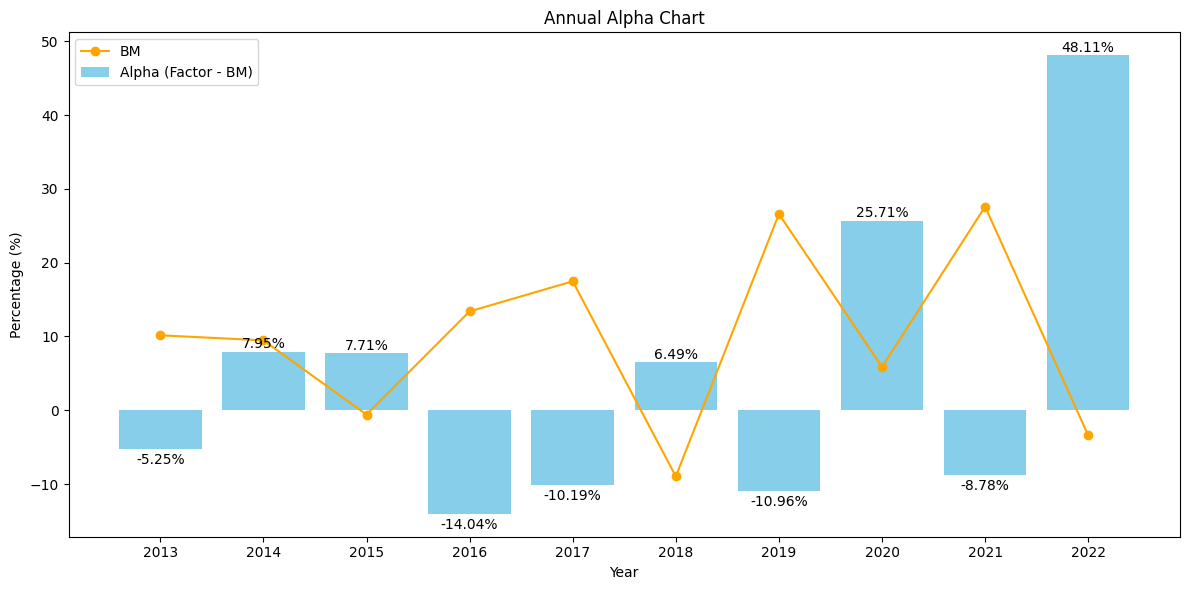

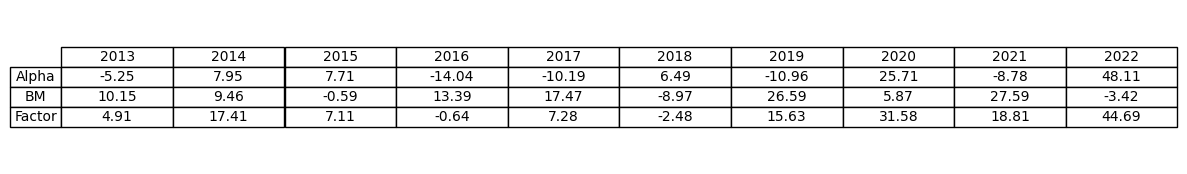

In [ ]:
# Assuming 'portfolio_daily_returns' and 'benchmark_daily_returns' are pandas Series of daily returns
# Annualize the daily returns to get Factor and BM
portfolio_annual_returns = portfolio_returns_df.resample('Y').apply(lambda x: (1 + x).prod() - 1)
benchmark_annual_returns = benchmark_daily_returns.resample('Y').apply(lambda x: (1 + x).prod() - 1)

# Compute the Alpha for each year
alpha_annual = portfolio_annual_returns - benchmark_annual_returns

# Convert the annual returns to percentage
portfolio_annual_returns *= 100
benchmark_annual_returns *= 100
alpha_annual *= 100

# Create a DataFrame for plotting
df_plot = pd.DataFrame({
    'Year': alpha_annual.index.year,
    'Alpha': alpha_annual.values,
    'BM': benchmark_annual_returns.values,
    'Factor': portfolio_annual_returns.values
})

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(df_plot['Year'], df_plot['Alpha'], color='skyblue', label='Alpha (Factor - BM)')

# Adding labels on the bars
for idx, row in df_plot.iterrows():
    ax.text(row['Year'], row['Alpha'] + (0.5 if row['Alpha'] > 0 else -2), f"{row['Alpha']:.2f}%",
            ha='center', color='black')

# Adding a line for BM
ax.plot(df_plot['Year'], df_plot['BM'], color='orange', label='BM', marker='o')

# Set the x-ticks to be the years
ax.set_xticks(df_plot['Year'])

# Labeling
ax.set_xlabel('Year')
ax.set_ylabel('Percentage (%)')
ax.set_title('Annual Alpha Chart')
ax.legend()

plt.tight_layout()
plt.show()

# Assuming df_plot is your DataFrame containing the 'Year', 'Alpha', 'BM', and 'Factor' columns
# Round your data to two decimal places
df_plot_rounded = df_plot.round(2)

# Set the 'Year' as the index for display purposes
df_plot_rounded.set_index('Year', inplace=True)

# Now, plot the table using DataFrame.plot
fig, ax = plt.subplots(figsize=(12, 2))  # Adjust the size as needed
ax.axis('tight')
ax.axis('off')
table_data = df_plot_rounded[['Alpha', 'BM', 'Factor']].transpose()
the_table = ax.table(cellText=table_data.values,
                     colLabels=table_data.columns,
                     rowLabels=table_data.index,
                     cellLoc='center', rowLoc='center',
                     loc='center')

# Adjust the font size if necessary
the_table.auto_set_font_size(False)
the_table.set_fontsize(10)
the_table.scale(1.2, 1.2)  # The scale factor to increase or decrease the size of the table cells.

plt.show()